#Machine learning to predict presence of cardiovascular disease

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
sb.set_theme()

In [3]:
df = pd.read_csv('Prepped dataset.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(year),age(int_year),female,male,BMI
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,50.391781,50,0,1,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,55.419178,55,1,0,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,51.663014,51,1,0,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,48.282192,48,0,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,47.873973,47,1,0,23.011177


#Model based on all features.

In [47]:
#Obtaining train test data
from sklearn.model_selection import train_test_split
X = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'female', 'male','BMI']].copy()
y = df[['cardio']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

#Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(700,1001,100),   # number of trees
              'max_depth': np.arange(8,14)}             # depth of trees

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.cardio)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 8,  9, 10, 11, 12, 13]),
                         'n_estimators': array([ 700,  800,  900, 1000])},
             scoring='accuracy')

In [31]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=900)
0.7336802624562859


In [32]:
rfc = RandomForestClassifier(n_estimators=900,max_depth=10)
rfc.fit(X_train,y_train.cardio)

RandomForestClassifier(max_depth=10, n_estimators=900)

Accuracy: 0.7545666254275526
True positive rate: 0.6943812807159099
False positive rate: 0.1861867282836306


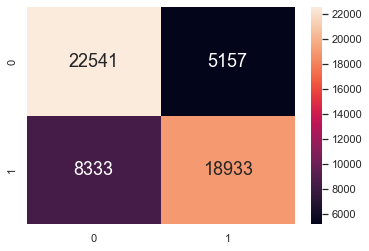

In [33]:
#Accuracy and confusion matrix for train data
rfc_train_pred = rfc.predict(X_train)
print("Accuracy:", rfc.score(X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, rfc_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, rfc_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7391209430941639
True positive rate: 0.6733115144302291
False positive rate: 0.19786324786324785


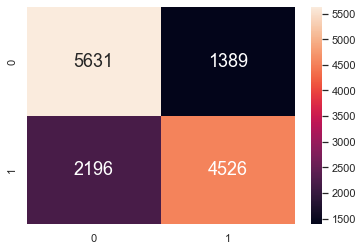

In [34]:
#Accuracy and confusion matrix for test data
rfc_test_pred = rfc.predict(X_test)
print("Accuracy:", rfc.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, rfc_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, rfc_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train.cardio)

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Accuracy: 0.71777890983189
True positive rate: 0.6836719724198635
False positive rate: 0.24864611163260886


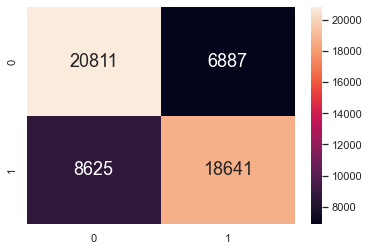

In [36]:
#Accuracy and confusion matrix for train data
lgr_train_pred = lgr.predict(X_train)
print("Accuracy:", lgr.score(X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, lgr_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, lgr_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7252947169262116
True positive rate: 0.6880392740255876
False positive rate: 0.23903133903133902


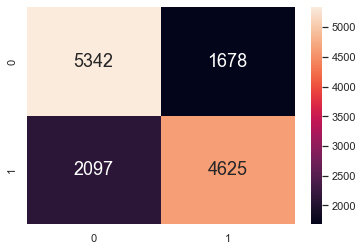

In [37]:
#Accuracy and confusion matrix for test data
lgr_test_pred = lgr.predict(X_test)
print("Accuracy:", lgr.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, lgr_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, lgr_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#Support Vector Classifier

For distance based models, if there is a large difference in scale of features then normalization or standardisation is required. This is because the distance calculation done uses feature values and when the one of the features has values much large than other, that feature will dominate the distance measure and hence the outcome of the model.

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Standardised data
s_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
s_svc.fit(X_train, y_train.cardio)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Accuracy: 0.7382104650316571
True positive rate: 0.6788674539719798
False positive rate: 0.2033720846270489


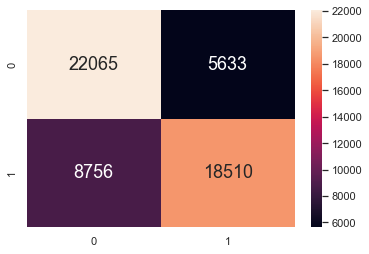

In [39]:
#Accuracy and confusion matrix for train data
s_svc_train_pred = s_svc.predict(X_train)
print("Accuracy:", s_svc.score(X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, s_svc_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, s_svc_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7360646194149323
True positive rate: 0.6700386789645939
False positive rate: 0.2007122507122507


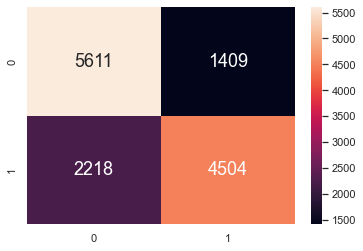

In [40]:
#Accuracy and confusion matrix for test data
s_svc_test_pred = s_svc.predict(X_test)
print("Accuracy:", s_svc.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, s_svc_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, s_svc_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

In [41]:
from sklearn.preprocessing import RobustScaler
#robust scaling of data (less influence by outliers)
r_svc = make_pipeline(RobustScaler(), SVC(gamma='auto'))
r_svc.fit(X_train, y_train.cardio)

Pipeline(steps=[('robustscaler', RobustScaler()), ('svc', SVC(gamma='auto'))])

Accuracy: 0.7331889964340296
True positive rate: 0.6654074671752366
False positive rate: 0.20008664885551303


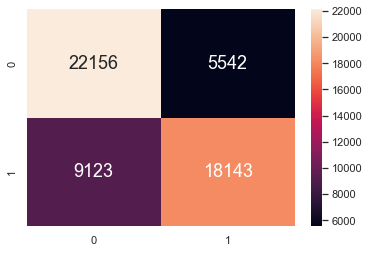

In [42]:
#Accuracy and confusion matrix for train data
r_svc_train_pred = r_svc.predict(X_train)
print("Accuracy:", r_svc.score(X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, r_svc_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, r_svc_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7354824625236501
True positive rate: 0.66081523356144
False positive rate: 0.19301994301994302


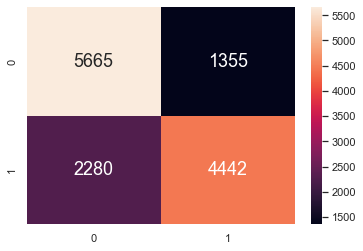

In [43]:
#Accuracy and confusion matrix for test data
r_svc_test_pred = r_svc.predict(X_test)
print("Accuracy:", r_svc.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, r_svc_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, r_svc_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#K-Nearest Neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Standardise data
scaler = StandardScaler()
stand_X_train = scaler.fit_transform(X_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(50,101,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(stand_X_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([ 50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [49]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=70)
0.7268758198779665


In [50]:
from sklearn.pipeline import make_pipeline
s_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=70))
s_knn.fit(stand_X_train, y_train.cardio)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=70))])

Accuracy: 0.7341896514081945
True positive rate: 0.6742829898041517
False positive rate: 0.2068380388475702


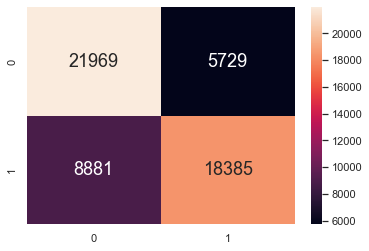

In [51]:
#Accuracy and confusion matrix for train data
s_knn_train_pred = s_knn.predict(stand_X_train)
print("Accuracy:", s_knn.score(stand_X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, s_knn_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, s_knn_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7308979770048027
True positive rate: 0.6703362094614698
False positive rate: 0.2111111111111111


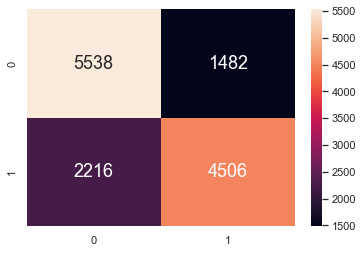

In [52]:
stand_X_test = scaler.fit_transform(X_test)
#Accuracy and confusion matrix for test data
s_knn_test_pred = s_knn.predict(stand_X_test)
print("Accuracy:", s_knn.score(stand_X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, s_knn_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, s_knn_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

In [55]:
from sklearn.preprocessing import MinMaxScaler

#minmax scaling of data
mmscaler = MinMaxScaler()
mm_X_train = mmscaler.fit_transform(X_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(30,81,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(mm_X_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([30, 40, 50, 60, 70, 80])},
             scoring='accuracy')

In [54]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=50)
0.7217997350040538


In [56]:
mm_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=50))
mm_knn.fit(mm_X_train, y_train.cardio)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=50))])

Accuracy: 0.7321337602794556
True positive rate: 0.6831218367197242
False positive rate: 0.21961874503574266


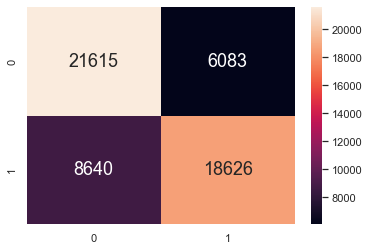

In [57]:
#Accuracy and confusion matrix for train data
mm_knn_train_pred = mm_knn.predict(mm_X_train)
print("Accuracy:", mm_knn.score(mm_X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, mm_knn_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, mm_knn_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.705283073788386
True positive rate: 0.7560249925617376
False positive rate: 0.3433048433048433


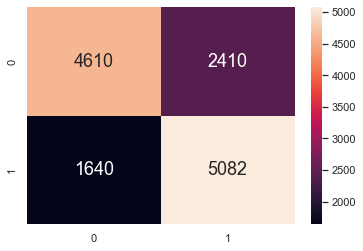

In [58]:
mm_X_test = mmscaler.fit_transform(X_test)
#Accuracy and confusion matrix for test data
mm_knn_test_pred = mm_knn.predict(mm_X_test)
print("Accuracy:", mm_knn.score(mm_X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, mm_knn_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, mm_knn_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

In [59]:
from sklearn.preprocessing import RobustScaler

#robust scaling of data (less influence by outliers)
robustscaler = RobustScaler()
r_X_train = robustscaler.fit_transform(X_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(50,101,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(r_X_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([ 50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [60]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=80)
0.7287679793850554


In [61]:
r_knn = make_pipeline(RobustScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=80))
r_knn.fit(r_X_train, y_train.cardio)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=80))])

Accuracy: 0.7345535259442544
True positive rate: 0.6739529083840681
False positive rate: 0.2057910318434544


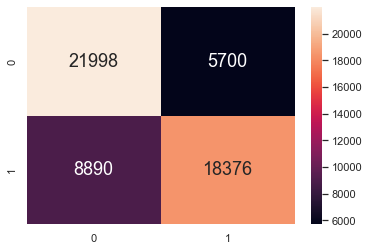

In [62]:
#Accuracy and confusion matrix for train data
r_knn_train_pred = r_knn.predict(r_X_train)
print("Accuracy:", r_knn.score(r_X_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, r_knn_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, r_knn_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7309707466162131
True positive rate: 0.6624516512942576
False positive rate: 0.20341880341880342


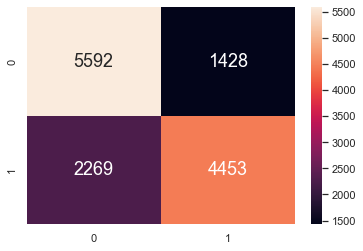

In [63]:
r_X_test = robustscaler.fit_transform(X_test)
#Accuracy and confusion matrix for test data
r_knn_test_pred = r_knn.predict(r_X_test)
print("Accuracy:", r_knn.score(r_X_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, r_knn_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, r_knn_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#Model based on identified features which have an observable relationship with cardio.

In [20]:
#Obtaining train test data
from sklearn.model_selection import train_test_split
X1 = df[['age', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'active', 'BMI']].copy()
y = df[['cardio']].copy()
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=24)

#Random Forest Classifier (selected features)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(700,1201,100),   # number of trees
              'max_depth': np.arange(7,12)}             # depth of trees

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X1_train, y_train.cardio)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11]),
                         'n_estimators': array([ 700,  800,  900, 1000, 1100, 1200])},
             scoring='accuracy')

In [14]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=8, n_estimators=1100)
0.7321520006578223


In [17]:
rfc1 = RandomForestClassifier(n_estimators=1100,max_depth=8)
rfc1.fit(X1_train,y_train.cardio)

RandomForestClassifier(max_depth=8, n_estimators=1100)

Accuracy: 0.7398479004439269
True positive rate: 0.6750531797843468
False positive rate: 0.19636796880641202


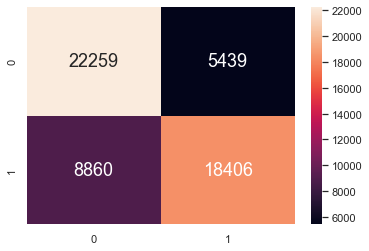

In [18]:
#Accuracy and confusion matrix for train data
rfc1_train_pred = rfc1.predict(X1_train)
print("Accuracy:", rfc1.score(X1_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, rfc1_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, rfc1_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7373744724203173
True positive rate: 0.665426956263017
False positive rate: 0.19373219373219372


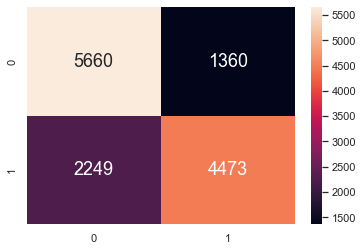

In [19]:
#Accuracy and confusion matrix for test data
rfc1_test_pred = rfc1.predict(X1_test)
print("Accuracy:", rfc1.score(X1_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, rfc1_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, rfc1_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#Logistic Regression (selected features)

In [20]:
from sklearn.linear_model import LogisticRegression
lgr1 = LogisticRegression()
lgr1.fit(X1_train, y_train.cardio)

C:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Accuracy: 0.6158758460082964
True positive rate: 0.5967872075111861
False positive rate: 0.3653332370568272


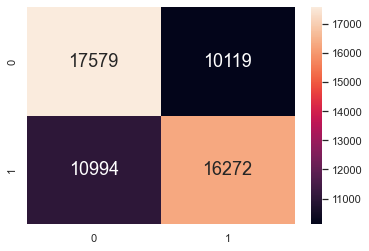

In [21]:
#Accuracy and confusion matrix for train data
lgr1_train_pred = lgr1.predict(X1_train)
print("Accuracy:", lgr1.score(X1_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, lgr1_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, lgr1_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.616940765536312
True positive rate: 0.5983338292174948
False positive rate: 0.36524216524216524


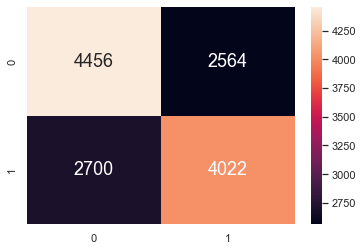

In [22]:
#Accuracy and confusion matrix for test data
lgr1_test_pred = lgr1.predict(X1_test)
print("Accuracy:", lgr1.score(X1_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, lgr1_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, lgr1_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#K-Nearest Neighbours (selected features)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Standardise data
scaler = StandardScaler()
stand_X1_train = scaler.fit_transform(X1_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(80,151,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(stand_X1_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([ 80,  90, 100, 110, 120, 130, 140, 150])},
             scoring='accuracy')

In [33]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=140)
0.7291682175411083


In [34]:
from sklearn.pipeline import make_pipeline
s_knn1 = make_pipeline(StandardScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=140))
s_knn1.fit(stand_X1_train, y_train.cardio)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=140))])

Accuracy: 0.7328615093515756
True positive rate: 0.6812880510525929
False positive rate: 0.2163694129540039


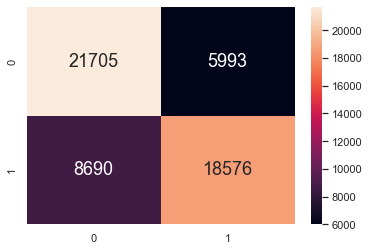

In [35]:
#Accuracy and confusion matrix for train data
s_knn1_train_pred = s_knn1.predict(stand_X1_train)
print("Accuracy:", s_knn1.score(stand_X1_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, s_knn1_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, s_knn1_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.7347547664095474
True positive rate: 0.6810473073490033
False positive rate: 0.21381766381766382


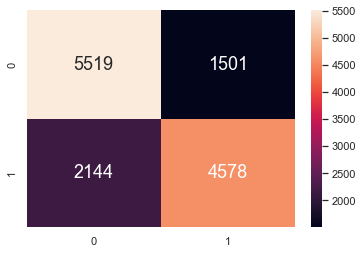

In [36]:
stand_X1_test = scaler.fit_transform(X1_test)
#Accuracy and confusion matrix for test data
s_knn1_test_pred = s_knn1.predict(stand_X1_test)
print("Accuracy:", s_knn1.score(stand_X1_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, s_knn1_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, s_knn1_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

In [37]:
from sklearn.preprocessing import MinMaxScaler

#minmax scaling of data
mmscaler = MinMaxScaler()
mm_X1_train = mmscaler.fit_transform(X1_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(100,151,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(mm_X1_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([100, 110, 120, 130, 140, 150])},
             scoring='accuracy')

In [38]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=110)
0.7276944829652746


In [39]:
mm_knn1 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=110))
mm_knn1.fit(mm_X1_train, y_train.cardio)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=110))])

Accuracy: 0.7324976348155157
True positive rate: 0.688806572287831
False positive rate: 0.22449274315835077


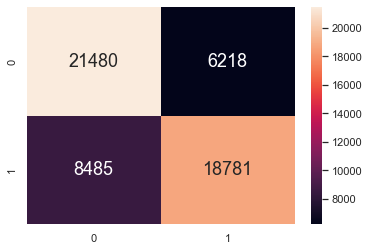

In [40]:
#Accuracy and confusion matrix for train data
mm_knn1_train_pred = mm_knn1.predict(mm_X1_train)
print("Accuracy:", mm_knn1.score(mm_X1_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, mm_knn1_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, mm_knn1_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.6821423373599185
True positive rate: 0.834870574233859
False positive rate: 0.4641025641025641


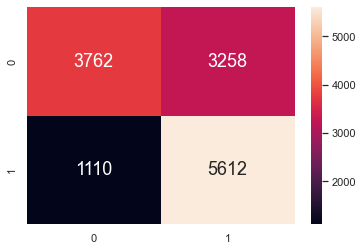

In [41]:
mm_X1_test = mmscaler.fit_transform(X1_test)
#Accuracy and confusion matrix for test data
mm_knn1_test_pred = mm_knn1.predict(mm_X1_test)
print("Accuracy:", mm_knn1.score(mm_X1_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, mm_knn1_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, mm_knn1_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

In [42]:
from sklearn.preprocessing import RobustScaler

#robust scaling of data (less influence by outliers)
robustscaler = RobustScaler()
r_X1_train = robustscaler.fit_transform(X1_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(80,151,10),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(r_X1_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([ 80,  90, 100, 110, 120, 130, 140, 150])},
             scoring='accuracy')

In [43]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=1, n_neighbors=110)
0.7293137580868916


In [44]:
r_knn1 = make_pipeline(RobustScaler(), KNeighborsClassifier(leaf_size=1,n_neighbors=110))
r_knn1.fit(r_X1_train, y_train.cardio)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=110))])

Accuracy: 0.7330070591659995
True positive rate: 0.678353993985183
False positive rate: 0.21319228825185935


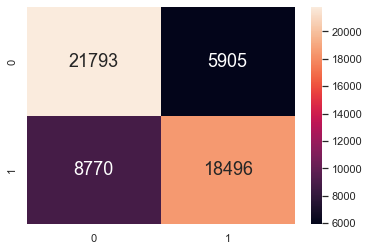

In [45]:
#Accuracy and confusion matrix for train data
r_knn1_train_pred = r_knn1.predict(r_X1_train)
print("Accuracy:", r_knn1.score(r_X1_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, r_knn1_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, r_knn1_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.734390918352496
True positive rate: 0.6719726271942874
False positive rate: 0.20584045584045585


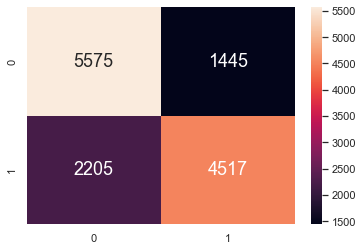

In [46]:
r_X1_test = robustscaler.fit_transform(X1_test)
#Accuracy and confusion matrix for test data
r_knn1_test_pred = r_knn1.predict(r_X1_test)
print("Accuracy:", r_knn1.score(r_X1_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, r_knn1_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, r_knn1_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#KNN with only 4 features

In [11]:
#Obtaining train test data
from sklearn.model_selection import train_test_split
X2 = df[['weight', 'ap_hi', 'ap_lo',
       'cholesterol']].copy()
y = df[['cardio']].copy()
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=24)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
mm_X2_train = mmscaler.fit_transform(X2_train)

# Define the Hyper-parameter Grid to search on, in case of KNN
param_grid = {'n_neighbors': np.arange(100,151),  
              'leaf_size': np.arange(1,4)}        

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(KNeighborsClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(mm_X2_train, y_train.cardio)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([1, 2, 3]),
                         'n_neighbors': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150])},
             scoring='accuracy')

In [15]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

KNeighborsClassifier(leaf_size=2, n_neighbors=147)
0.7230914793468545


In [16]:
from sklearn.pipeline import make_pipeline
mm_knn2 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(leaf_size=2,n_neighbors=147))
mm_knn2.fit(mm_X2_train, y_train.cardio)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=147))])

Accuracy: 0.7256749872643913
True positive rate: 0.6522408860852343
False positive rate: 0.20203624810455628


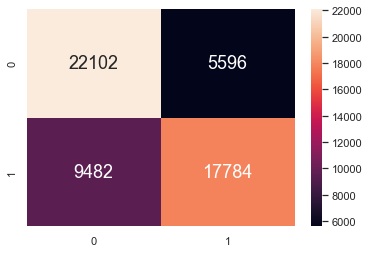

In [17]:
#Accuracy and confusion matrix for train data
mm_knn2_train_pred = mm_knn2.predict(mm_X2_train)
print("Accuracy:", mm_knn2.score(mm_X2_train, y_train))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, mm_knn2_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_train, mm_knn2_train_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

Accuracy: 0.6996070440983845
True positive rate: 0.7390657542398096
False positive rate: 0.3381766381766382


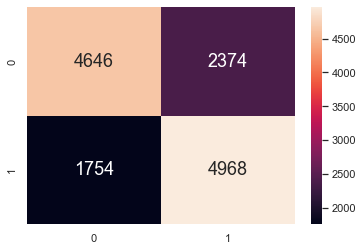

In [18]:
mm_X2_test = mmscaler.fit_transform(X2_test)
#Accuracy and confusion matrix for test data
mm_knn2_test_pred = mm_knn2.predict(mm_X2_test)
print("Accuracy:", mm_knn2.score(mm_X2_test, y_test))
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, mm_knn2_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
tn, fp, fn, tp = confusion_matrix(y_test, mm_knn2_test_pred).ravel()
#True positive rate = true positive/(true positive+false negative)
print("True positive rate:",tp/(tp+fn))
#False positive rate = false positive/(false positive+true negative)
print("False positive rate:",fp/(fp+tn))

#